In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB, BernoulliNB, CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [ ]:
#
#
# VINO
#
#


Preproceso Vinos

In [ ]:
#Importación de los datos del dataset y Mostrar las primeras y últimas filas del dataframe importado

wines = pd.read_csv('/content/WineQT.csv')
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
# Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)
media = np.mean(wines)
media

fixed acidity             8.311111
volatile acidity          0.531339
citric acid               0.268364
residual sugar            2.532152
chlorides                 0.086933
free sulfur dioxide      15.615486
total sulfur dioxide     45.914698
density                   0.996730
pH                        3.311015
sulphates                 0.657708
alcohol                  10.442111
quality                   5.657043
Id                      804.969379
dtype: float64

In [ ]:
mediana = np.median(wines)
mediana

3.34

In [ ]:
varianza = np.var(wines)
varianza

fixed acidity                3.051416
volatile acidity             0.032240
citric acid                  0.038651
residual sugar               1.836904
chlorides                    0.002232
free sulfur dioxide        104.980539
total sulfur dioxide      1073.727850
density                      0.000004
pH                           0.024522
sulphates                    0.029010
alcohol                      1.170123
quality                      0.648785
Id                      215104.965816
dtype: float64

In [ ]:
desviacion_tipica = np.std(wines)
desviacion_tipica

fixed acidity             1.746830
volatile acidity          0.179555
citric acid               0.196600
residual sugar            1.355324
chlorides                 0.047247
free sulfur dioxide      10.246001
total sulfur dioxide     32.767787
density                   0.001924
pH                        0.156596
sulphates                 0.170324
alcohol                   1.081722
quality                   0.805472
Id                      463.794099
dtype: float64

In [ ]:
minimo = wines.min()
minimo

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
Id                      0.00000
dtype: float64

In [ ]:
maximo = wines.max()
maximo

fixed acidity             15.90000
volatile acidity           1.58000
citric acid                1.00000
residual sugar            15.50000
chlorides                  0.61100
free sulfur dioxide       68.00000
total sulfur dioxide     289.00000
density                    1.00369
pH                         4.01000
sulphates                  2.00000
alcohol                   14.90000
quality                    8.00000
Id                      1597.00000
dtype: float64

In [ ]:
Q1 = np.quantile(wines,0.25)
Q1

0.635

In [ ]:
Q3 = np.quantile(wines,0.75)
Q3

10.1

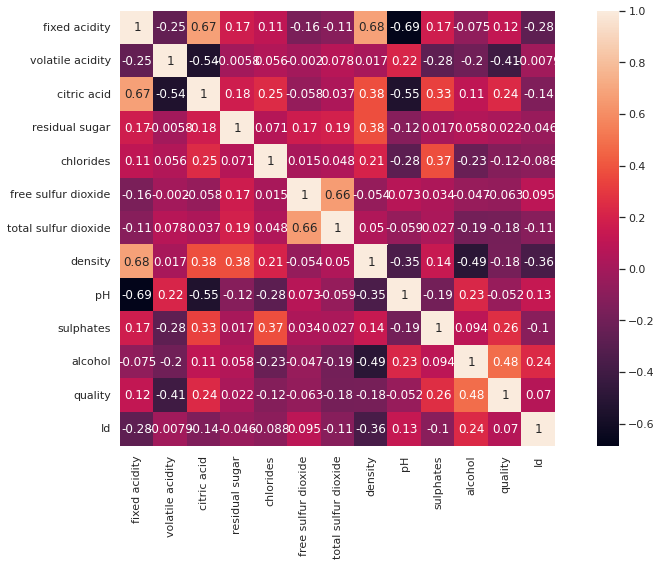

In [ ]:
# Mostrar un mapa de calor que indique la correlación entre variables
sbn.set(rc = {'figure.figsize':(15,8)})
sbn.heatmap(wines.corr(), square=True, annot=True)

In [ ]:
# Seleccionar las características a tener en cuenta en el estudio
#Se implementa en la parte de optimizacion
wine_opty = wines.drop('volatile acidity', axis = 1)

In [ ]:
# Separar datos entre datos de entrada y etiquetas (resultados)
x_wine = wines.drop('quality', axis = 1)
y_wine = wines['quality']
y_wine


0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [ ]:
# Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)
x_train, x_test, y_train, y_test = train_test_split(x_wine,y_wine, random_state=1, test_size=0.25)



In [ ]:
# Elegir, instanciar y entrenar el modelo
model = ComplementNB()
model.fit(x_train,y_train)



ComplementNB()

In [ ]:
# Realizar una predicción con los datos de prueba
y_predict = model.predict(x_test)
y_predict

array([6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 7, 5, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 7, 6,
       6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5])

In [ ]:
# Mostrar el porcentaje de elementos correctamente clasificados
accuracy_score(y_test,y_predict)


0.513986013986014

Evaluacion Vinos


In [ ]:
# Mostrar la predicción realizada (imprimir la variable con la predicción)
for i in (0,len(y_predict)-1):
  print("prediccion: {a} real: {b}".format(a = y_predict[i], b = y_wine[i]))

prediccion: 6 real: 5
prediccion: 5 real: 6


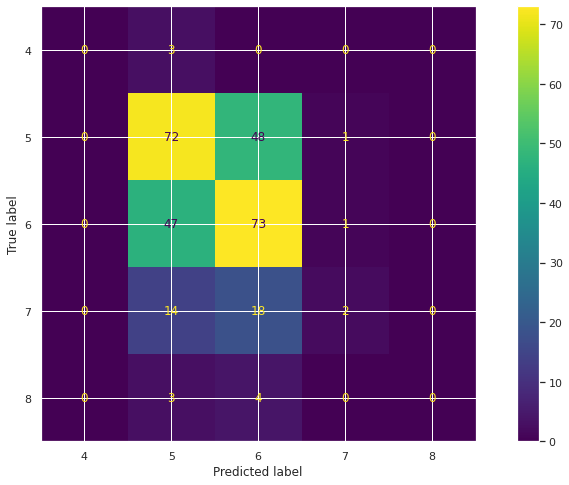

In [ ]:
# Representar gráficamente la clasificación obtenida (matriz de confusión)
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

Oprimizacion 1 Vinos

In [ ]:
model_opti = BernoulliNB()
model_opti.fit(x_train,y_train)

BernoulliNB()

In [ ]:
y_predict_opti = model_opti.predict(x_test)
y_predict_opti

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
accuracy_score(y_test,y_predict_opti)

0.40559440559440557

Optimizacion 2 Vinos

In [ ]:
wine_opti = wines.drop('volatile acidity', axis = 1)
x_wine_opti = wine_opti.drop('quality', axis = 1)
y_wine_opti = wine_opti['quality']
x_train_opti_wine, x_test_opti_wine, y_train_opti_wine, y_test_opti_wine = train_test_split(x_wine_opti_wine,y_wine_opti_wine, random_state=1, test_size=0.25)
model_opti_wine = GaussianNB()
model_opti_wine.fit(x_train_opti_wine,y_train_opti_wine)
y_predict_opti_wine = model_opti.predict(x_test_opti_wine)
accuracy_score(y_test_opti_wine,y_predict_opti_wine)


0.6013986013986014

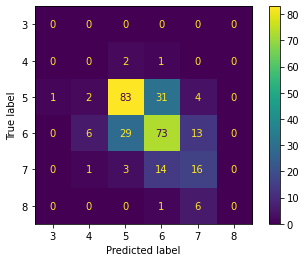

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_opti_wine,y_predict_opti_wine)

In [ ]:
#
#
# ENFERMEDAD DEL CORAZON
#
#

Preproceso Corazon

In [ ]:
heart = pd.read_csv("/content/heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)
media = np.mean(heart)
media

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [ ]:
mediana = np.median(heart)
mediana

1.0

In [ ]:
varianza = np.var(heart)
varianza

age           82.212332
sex            0.216449
cp             1.061617
trestbps     306.571317
chol        2677.560653
fbs            0.126458
restecg        0.275616
thalach      522.914899
exang          0.219978
oldpeak        1.343646
slope          0.378481
ca             1.042273
thal           0.373645
target         0.248015
dtype: float64

In [ ]:
desviacion_tipica = np.std(heart)
desviacion_tipica

age          9.067102
sex          0.465241
cp           1.030348
trestbps    17.509178
chol        51.745151
fbs          0.355610
restecg      0.524991
thalach     22.867333
exang        0.469019
oldpeak      1.159157
slope        0.615208
ca           1.020918
thal         0.611265
target       0.498011
dtype: float64

In [ ]:
minimo = heart.min()
minimo

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

In [ ]:
maximo = heart.max()
maximo

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

In [ ]:
Q1 = np.quantile(heart,0.25)
Q1

0.0

In [ ]:
Q3 = np.quantile(heart,0.75)
Q3

55.0

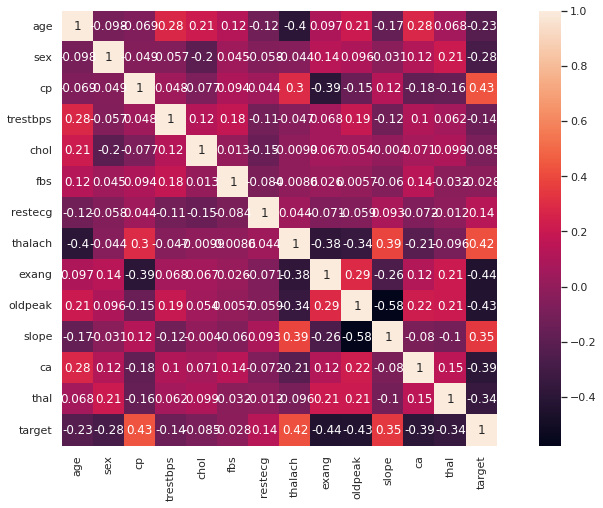

In [ ]:
# Mostrar un mapa de calor que indique la correlación entre variables
sbn.set(rc = {'figure.figsize':(15,8)})
sbn.heatmap(heart.corr(), square=True, annot=True)

In [ ]:
# Seleccionar las características a tener en cuenta en el estudio
#Se implementa en la parte de optimizacion
heart_old_peak = heart.drop('exang', axis = 1)


In [ ]:
# Separar datos entre datos de entrada y etiquetas (resultados)
x_heart = heart.drop('target', axis=1)
y_heart = heart['target']
y_heart


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)
x_train_heart, x_test_heart, y_train_heart, y_test_heart = train_test_split(x_heart,y_heart, random_state=1, test_size=0.25)

Entrenamiento y prediccion Corazon

In [ ]:
# Elegir, instanciar y entrenar el modelo
model_heart = GaussianNB()
model_heart.fit(x_train_heart,y_train_heart)

GaussianNB()

In [ ]:
x_test_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3


In [ ]:
y_predict_heart = model_heart.predict(x_test_heart)
y_predict_heart

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# Mostrar el porcentaje de elementos correctamente clasificados
accuracy_score(y_test_heart,y_predict_heart)

0.7894736842105263

Evaluacion Corazon

In [ ]:
# Mostrar la predicción realizada (imprimir la variable con la predicción)
for i in (0,len(y_predict_heart)-1):
  print("prediccion: {a} real: {b}".format(a = y_predict_heart[i], b = y_heart[i]))

prediccion: 0 real: 1
prediccion: 1 real: 1


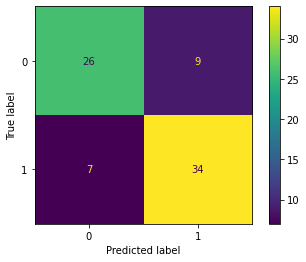

In [ ]:
# Representar gráficamente la clasificación obtenida (matriz de confusión)
ConfusionMatrixDisplay.from_predictions(y_test_heart,y_predict_heart)

Optimizacion Vinos 

In [ ]:
heart_opti= heart.drop('exang', axis = 1)
x_heart_opti = heart_opti.drop('target', axis = 1)
y_heart_opti = heart_opti['target']
x_train_opti_heart, x_test_opti_heart, y_train_opti_heart, y_test_opti_heart = train_test_split(x_heart_opti,y_heart_opti, random_state=1, test_size=0.25)
model_opti_heart = BernoulliNB()
model_opti_heart.fit(x_train_opti_heart,y_train_opti_heart)
y_predict_opti_heart= model_opti_heart.predict(x_test_opti_heart)
accuracy_score(y_test_opti_heart,y_predict_opti_heart)

0.7631578947368421